# Photon Attenuation Data Analysis

In [2]:
# Importing modules needed for data analysis.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import glob
import os

In [3]:
# Make a list of lines on .spe files to be ignored
skip=[0,1,2,3,4,5,6,7,8,9,10,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074]

# Useful helper functions
## Reads multiple files
def read_multi_csv(start_sample,end_sample,path):     
    samples = list(range(start_sample,end_sample+1))     
    dfs = []
    for N in samples:         
        file = 'https://gitlab.com/xmoskala/labdata/-/raw/main/photonlab'+path+str(N)+'.SPE'  
        file = file.replace(" ", "%20")
        #print (file)         
        df = pd.read_csv(file, skiprows=skip, header=0, names=["Data"])         
        dfs.append(df) 
    return dfs
## Averages the multiple files read
def aver(files):
    sample = files[0]
    for i in range(len(files)):
        sample = sample.add(files[i], axis=0)
    sample = sample.div(len(files)).add(0.5).astype(int)
    return sample


In [4]:
def url(path):
    path = 'https://gitlab.com/xmoskala/labdata/-/raw/main/photonlab'+path+'.Spe'
    path = path.replace(" ", "%20")
    return path
Bg60 = pd.read_csv(url("/9-6-22/Background (60s)"), skiprows=skip, header=0, names=["Data"])  
Cs60 = pd.read_csv(url("/9-6-22/Cs/Cs (60s)"), skiprows=skip, header=0, names=["Data"])  
CsAlH60 = pd.read_csv(url("/9-6-22/Cs/Cs Alu High (60s)"), skiprows=skip, header=0, names=["Data"])  
CsAlM60 = pd.read_csv(url("/9-6-22/Cs/Cs Alu Mid (60s)"), skiprows=skip, header=0, names=["Data"])  
CsAlL60 = pd.read_csv(url("/9-6-22/Cs/Cs Alu Low (60s)"), skiprows=skip, header=0, names=["Data"])  
CsCuH60 = pd.read_csv(url("/9-6-22/Cs/Cs Cu High (60s)"), skiprows=skip, header=0, names=["Data"])  
CsCuM60 = pd.read_csv(url("/9-6-22/Cs/Cs Cu Mid (60s)"), skiprows=skip, header=0, names=["Data"])  
CsCuL60 = pd.read_csv(url("/9-6-22/Cs/Cs Cu Low (60s)"), skiprows=skip, header=0, names=["Data"])  
CsPbH60 = pd.read_csv(url("/9-6-22/Cs/Cs Pb High (60s)"), skiprows=skip, header=0, names=["Data"])  
CsPbM60 = pd.read_csv(url("/9-6-22/Cs/Cs Pb Mid (60s)"), skiprows=skip, header=0, names=["Data"])  
CsPbL60 = pd.read_csv(url("/9-6-22/Cs/Cs Pb Low (60s)"), skiprows=skip, header=0, names=["Data"])  



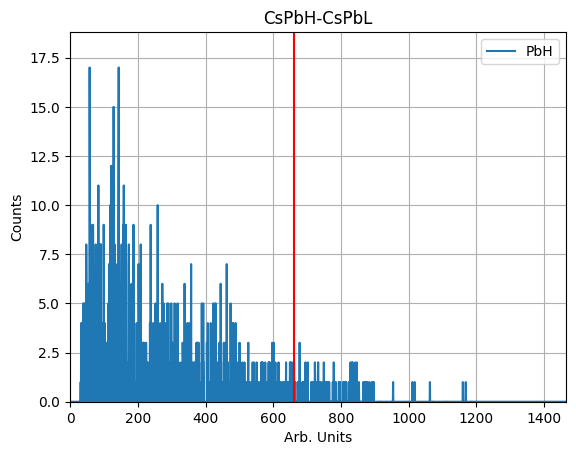

In [5]:
#Plot Cesium Data
Csbin = 0.715 # Bin size from calibration on Maestro
Csx = np.arange(0,2048,Csbin)[0:len(Cs60)]
fig, ax = plt.subplots()
#ax.plot(Bg60, label="Bg")
#ax.plot(Cs60, label="Cs")
#ax.plot(CsAlH60, label="AlH")
#ax.plot(CsAlM60, label="AlM")
#ax.plot(CsAlL60, label="AlL")
#ax.plot(CsCuH60, label="CuH")
#ax.plot(CsCuM60, label="CuM")
#ax.plot(CsCuL60, label="CuL")
#ax.plot(CsPbH60, label="PbH")
#ax.plot(CsPbM60, label="PbM")
#ax.plot(CsPbL60, label="PbL")
#ax.plot(CsAlH60-CsAlL60, label="AlH")
#ax.plot(CsCuH60-CsCuL60, label="CuH")
ax.plot(Csx,CsPbH60-CsPbL60, label="PbH")
ax.axvline(662,color='r')

plt.xlim(0,Csbin*len(Cs60))
plt.ylim(0)

ax.set(xlabel='Arb. Units', ylabel='Counts',
       title='CsPbH-CsPbL')
ax.grid()
ax.legend()
plt.show()

In [6]:
# Read spectrum files (.spe) as .csv with pandas



## Number of samples to average through (Co & Ba have 5 trials [0-4] so it is by default set to 4)
endnumber = 4

## Cesium(Cs) Readings
### Cs Background(Bg)
CsBgFiles=read_multi_csv(0,endnumber,"/9-15-22/Background/Background00")    #Read files
CsBg = aver(CsBgFiles)    #Average

### Cs 
CsFiles=read_multi_csv(0,endnumber,"/9-15-22/Cs/Cs00")    #Read files
Cs = aver(CsFiles)    #Average

### Cs Al
CsAlFiles=read_multi_csv(0,endnumber,"/9-15-22/Cs Alu/Cs Alu00")    #Read files
CsAl = aver(CsAlFiles)    #Average

### Cs Cu
CsCuFiles=read_multi_csv(0,endnumber,"/9-15-22/Cs Cu/Cs Cu00")    #Read files
CsCu = aver(CsCuFiles)    #Average

### Cs Pb
CsPbFiles=read_multi_csv(0,endnumber,"/9-15-22/Cs Pb/Cs Pb00")    #Read files
CsPb = aver(CsPbFiles)    #Average

## Barium(Ba) Readings
### Ba Background(Bg)
BaBgFiles=read_multi_csv(0,endnumber,"/9-20-22/Background/Background00")    #Read files
BaBg = aver(BaBgFiles)    #Average

### Ba 
BaFiles=read_multi_csv(0,endnumber,"/9-20-22/Ba/Ba00")    #Read files
Ba = aver(BaFiles)    #Average

### Ba Al
BaAlFiles=read_multi_csv(0,endnumber,"/9-20-22/Ba Alu/Ba Alu00")    #Read files
BaAl = aver(BaAlFiles)    #Average

### Ba Cu
BaCuFiles=read_multi_csv(0,endnumber,"/9-20-22/Ba Cu/Ba Cu00")    #Read files
BaCu = aver(BaCuFiles)    #Average

### Ba Pb
BaPbFiles=read_multi_csv(0,endnumber,"/9-20-22/Ba Pb/Ba Pb00")    #Read files
BaPb = aver(BaPbFiles)    #Average

## Cobalt(Co) Readings
### Co Background(Bg)
CoBgFiles=read_multi_csv(0,endnumber,"/9-22-22/Background/Background00")    #Read files
CoBg = aver(CoBgFiles)    #Average

### Co 
CoFiles=read_multi_csv(0,endnumber,"/9-22-22/Co/Co00")    #Read files
Co = aver(CoFiles)    #Average

### Co Al
CoAlFiles=read_multi_csv(0,endnumber,"/9-22-22/Co Alu/Co Alu00")    #Read files
CoAl = aver(CoAlFiles)    #Average

### Co Cu
CoCuFiles=read_multi_csv(0,endnumber,"/9-22-22/Co Cu/Co Cu00")    #Read files
CoCu = aver(CoCuFiles)    #Average

### Co Pb
CoPbFiles=read_multi_csv(0,endnumber,"/9-22-22/Co Pb/Co Pb00")    #Read files
CoPb = aver(CoPbFiles)    #Average



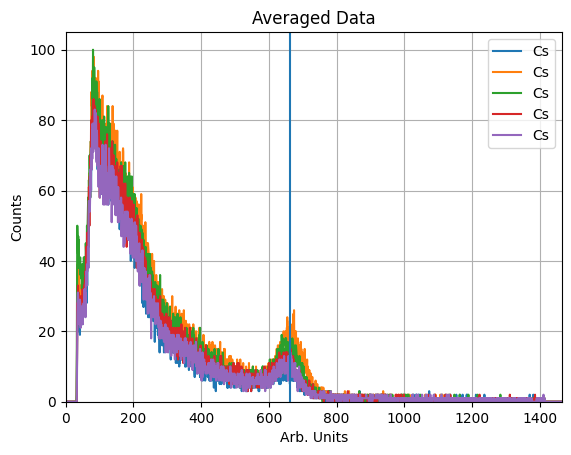

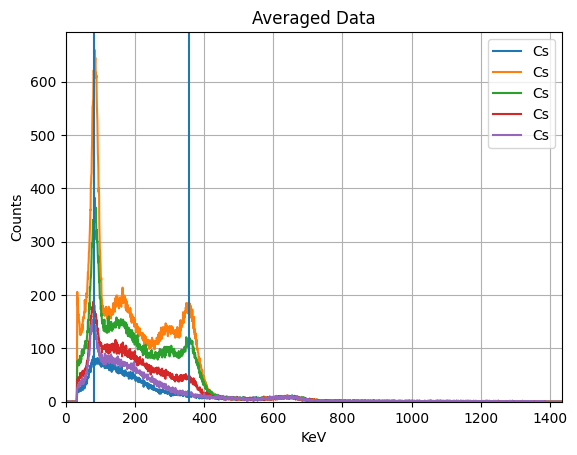

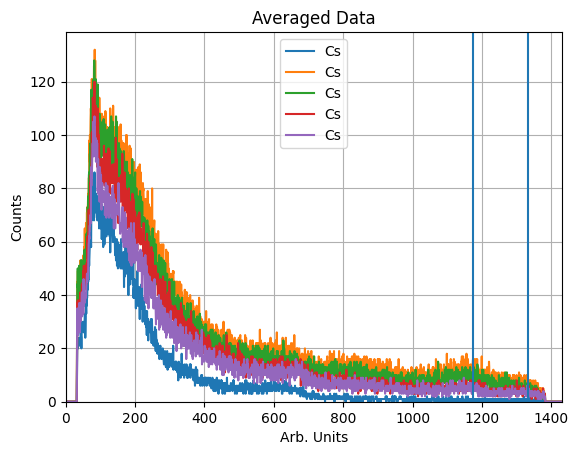

In [7]:
#Plot Cesium Data
Csbin = 0.715 # Bin size from calibration on Maestro
Csy = np.arange(0,2048,Csbin)[0:len(Cs)]
fig, ax = plt.subplots()
ax.plot(Csy, CsBg, label="Cs")
ax.plot(Csy, Cs, label="Cs")
ax.plot(Csy, CsAl, label="Cs")
ax.plot(Csy, CsCu, label="Cs")
ax.plot(Csy, CsPb, label="Cs")
ax.axvline(662)

plt.xlim(0,Csbin*len(Cs))
plt.ylim(0)

ax.set(xlabel='Arb. Units', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()

#Plot Barium Data
Babin = 0.70 # Bin size from calibration on Maestro
Bay = np.arange(0,2048,Babin)[0:len(Ba)]
fig, ax = plt.subplots()
ax.plot(Bay, BaBg, label="Cs")
ax.plot(Bay, Ba, label="Cs")
ax.plot(Bay, BaAl, label="Cs")
ax.plot(Bay, BaCu, label="Cs")
ax.plot(Bay, BaPb, label="Cs")
ax.axvline(81)
ax.axvline(356)

plt.xlim(0,Babin*len(Ba))
plt.ylim(0)

ax.set(xlabel='KeV', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()

#Plot Co Data
Cobin = 0.698 # Bin size from calibration on Maestro
Coy = np.arange(0,2048,Cobin)[0:len(Co)]
fig, ax = plt.subplots()
ax.plot(Coy, CoBg, label="Cs")
ax.plot(Coy, Co, label="Cs")
ax.plot(Coy, CoAl, label="Cs")
ax.plot(Coy, CoCu, label="Cs")
ax.plot(Coy, CoPb, label="Cs")
ax.axvline(1173)
ax.axvline(1332)


plt.xlim(0,Cobin*len(Co))
plt.ylim(0)

ax.set(xlabel='Arb. Units', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()

plt.show()

In [8]:
Cobalt = pd.read_csv("./9-22-22/Calib/Calib000.SPE", skiprows=skip, header=0, names=["Data"]) 

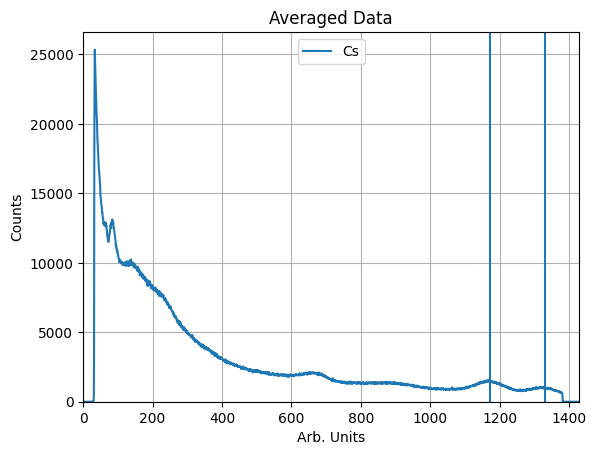

In [9]:
#Plot Co Data
Cobin = 0.698 # Bin size from calibration on Maestro
Coy = np.arange(0,2048,Cobin)[0:len(Co)]
fig, ax = plt.subplots()
ax.plot(Coy, Cobalt, label="Cs")
ax.axvline(1173)
ax.axvline(1332)


plt.xlim(0,Cobin*len(Co))
plt.ylim(0)

ax.set(xlabel='Arb. Units', ylabel='Counts',
       title='Averaged Data')
ax.grid()
ax.legend()

plt.show()

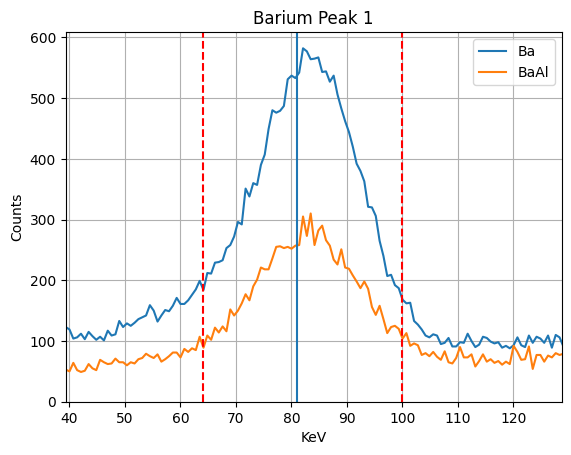

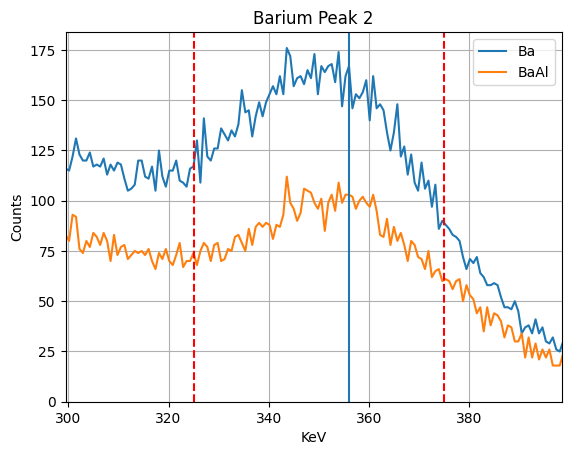

In [10]:
#Plot Barium PK1 Data
Babin = 0.69 # Bin size from calibration on Maestro
Bay = np.arange(0,2048,Babin)[0:len(Ba)]
fig, ax = plt.subplots()
b1=int(40/Babin)
b2=int(130/Babin)
ax.plot(Bay[b1:b2], (Ba-BaBg)[b1:b2], label="Ba")
ax.plot(Bay[b1:b2], (BaAl-BaBg)[b1:b2], label="BaAl")
ax.axvline(81)
ax.axvline(64,ls='--',color='r')
ax.axvline(100,ls='--',color='r')

plt.xlim(Babin*b1,Babin*b2-1)
plt.ylim(0)

ax.set(xlabel='KeV', ylabel='Counts',
       title='Barium Peak 1')
ax.grid()
ax.legend()
#Plot Barium PK2 Data
Bay = np.arange(0,2048,Babin)[0:len(Ba)]
fig, ax = plt.subplots()
b3=int(300/Babin)
b4=int(400/Babin)
ax.plot(Bay[b3:b4], (Ba-BaBg)[b3:b4], label="Ba")
ax.plot(Bay[b3:b4], (BaAl-BaBg)[b3:b4], label="BaAl")
ax.axvline(356)
ax.axvline(325,ls='--',color='r')
ax.axvline(375,ls='--',color='r')

plt.xlim(Babin*b3,Babin*b4-1)
plt.ylim(0)

ax.set(xlabel='KeV', ylabel='Counts',
       title='Barium Peak 2')
ax.grid()
ax.legend()

In [11]:
Badif=np.concatenate(np.asarray((Ba-BaBg)[b1:b2]))
Badify= Bay[b1:b2]


In [ ]:
#Cesium [NO Absorber]
##interval to find peak
Csb1=int(550/Csbin+0.5)
Csb2=int(800/Csbin+0.5)
##removing the background an applying the bounds
difCs=(Cs-CsBg)[Csb1:Csb2]
difCsx=Csx[Csb1:Csb2]
##generating statistics
meanCs, stdCs = norm.fit(difCs)
wCs = 2*np.sqrt(2*np.exp(2))*stdCs
maxCs = np.max(difCs)
xmaxCs = int(np.average(np.where(difCs==maxCs)[0])+0.5)
peakx = difCsx[xmaxCs]
plt.plot(difCsx,difCs)
plt.axvline(int(maxCs+peakx+0.5))
plt.axvline(int(-maxCs+peakx+0.5))
Csc = int(np.sum(difCs[int(xmaxCs-maxCs):int(xmaxCs+maxCs)]))
print(Csc)